In [1]:
import ultralytics
from ultralytics import YOLO
import os
import math
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt
import numpy as np

import board.corners as corners

import warnings
warnings.filterwarnings("ignore")


image 1/1 c:\Users\Gebruiker\Desktop\School\Extended Reality\ChessAR_final\ChessAR\images\img_3.jpg: 640x480 4 corners, 83.9ms
Speed: 5.1ms preprocess, 83.9ms inference, 1610.6ms postprocess per image at shape (1, 3, 640, 480)


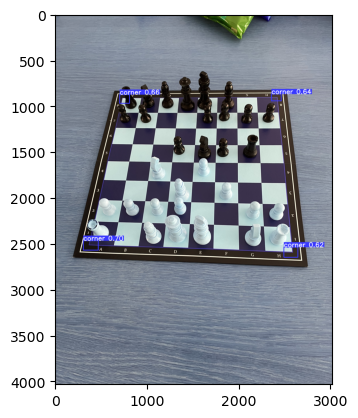

In [2]:
corners_model = YOLO('models/corners.pt')
img_path = 'images/img_3.jpg'

# img = Image.open(img_path)
# plt.imshow(img)
# plt.title('Original Image')
# plt.show()

results = corners.predict_corners(corners_model, img_path, confidence_threshold=0.25, iou_threshold=0.1)

image_corners = results[0].plot(line_width=7, font_size=15)
plt.imshow(image_corners)
plt.show()

# print(corners.box_coordinates(results))


[(389.38556, 2521.9478), (864.57904, 925.97253), (2407.401, 835.52277), (2717.2473, 2486.6787)]


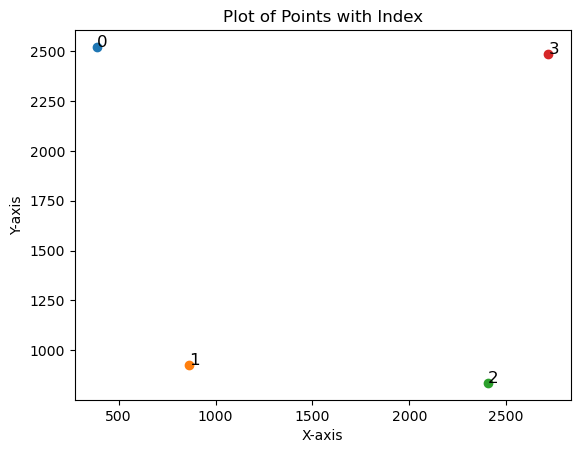

In [3]:
sorted_corners = corners.get_sorted_corner_coordinates(results, offsetx=250, offsety=250)
print(sorted_corners)

# Plot the points and label them with their index
for (i,point) in enumerate(sorted_corners):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i), fontsize=12)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Points with Index')

# Show the plot
plt.show()


In [4]:
# load image
image = cv2.imread(img_path)

# Suppose corners are in the format [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
# and are ordered as [top-left, top-right, bottom-right, bottom-left]
corners1 = np.array(sorted_corners, dtype="float32")

# Define the dimensions of the window where the new image will be displayed
dimension = 300  # Set this to what fits your needs, maybe 300x300 or 400x400 pixels

# The destination points are the points of the new image (a perfect square)
dst = np.array([
    [0, 0],
    [dimension - 1, 0],
    [dimension - 1, dimension - 1],
    [0, dimension - 1]
], dtype="float32")
# Compute the perspective transform matrix and apply it
M = cv2.getPerspectiveTransform(corners1, dst)
warped = cv2.warpPerspective(image, M, (dimension, dimension))
# Resize the warped image for display
resized_warped_image = cv2.resize(warped, (800, 600))

# Display the result
cv2.imshow('Warped Image', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()